In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import sidekick

In [73]:
df = pd.read_csv(
    "https://storage.googleapis.com/bucket-8732/datalibrary/forecast_sales.csv"
)

# Corrupt the dataset
df.loc[[0, 5, 100], "Year"] = np.NaN
df.loc[[0, 1, 2], "Day"] = np.NaN

# Remove duplicate rows
df = sidekick.remove_duplicate_table_rows(df)




table = df.copy()

In [74]:
## Inspect what the data contains

In [75]:
table.head()

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
0,2016-01-01,NaN,1,NaN,Mammoth,Stockholm,Family,Low,No,Yes,No,304.40
1,2016-01-01,2016.0,1,NaN,Cuckoo,Stockholm,Standard,Low,No,Yes,No,0.00
2,2016-01-01,2016.0,1,NaN,Eel,Göteborg,Family,Medium,No,Yes,Yes,335.84
3,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
4,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06


In [76]:
# Here we see statistics about or features. 
# Notice that only the numerical ones have such statistics
table.describe()

,Year,Week,Revenue
count,99345.000000,99348.000000,99348.000000
mean,2017.499019,26.875428,122.806238
std,1.118332,15.067466,67.435750
min,2016.000000,1.000000,0.000000
25%,2016.000000,14.000000,79.820000
50%,2017.000000,27.000000,114.320000
75%,2018.000000,40.000000,158.310000
max,2019.000000,53.000000,577.520000


In [77]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99348 entries, 0 to 99347
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               99348 non-null  object 
 1   Year               99345 non-null  float64
 2   Week               99348 non-null  int64  
 3   Day                99345 non-null  object 
 4   Store Name         99348 non-null  object 
 5   Location           99348 non-null  object 
 6   Store Type         99348 non-null  object 
 7   Advertising Level  99348 non-null  object 
 8   Special Promotion  99348 non-null  object 
 9   Holiday            99348 non-null  object 
 10  Open               99348 non-null  object 
 11  Revenue            99348 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 9.9+ MB


In [78]:
# TODO: Might need to do one-hot encoding here
# Seems the platform is already converting categorical to one-hot

In [79]:
#table = sidekick.impute_table_columns(df, columns=["Year", "Day", "Advertising Level"], method="replace", value=4)
table = sidekick.impute_table_columns(table, columns=df.columns, target="Revenue", method="replace", value=8)
table

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
0,2016-01-01,8.0,1,8,Mammoth,Stockholm,Family,Low,No,Yes,No,304.40
1,2016-01-01,2016.0,1,8,Cuckoo,Stockholm,Standard,Low,No,Yes,No,0.00
2,2016-01-01,2016.0,1,8,Eel,Göteborg,Family,Medium,No,Yes,Yes,335.84
3,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
4,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06
...,...,...,...,...,...,...,...,...,...,...,...,...
99343,2019-12-31,2019.0,53,Tuesday,Moose,Stockholm,Standard,Medium,No,Yes,No,0.00
99344,2019-12-31,2019.0,53,Tuesday,Narwhal,Linköping,Standard,Low,No,Yes,No,0.00
99345,2019-12-31,2019.0,53,Tuesday,Manatee,Oslo,Family,Low,No,Yes,Yes,195.25
99346,2019-12-31,2019.0,53,Tuesday,Grouse,Stockholm,Select,8,No,Yes,No,0.00


In [80]:
table = sidekick.impute_table_columns(df, columns=df.columns, target="Revenue", method="drop")
table

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
3,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
4,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06
6,2016-01-01,2016.0,1,Friday,Shark,Malmö,Standard,Medium,No,Yes,No,0.00
9,2016-01-01,2016.0,1,Friday,Giraffe,Oslo,Family,Low,No,Yes,Yes,204.10
14,2016-01-01,2016.0,1,Friday,Crocodile,Göteborg,Family,Low,No,Yes,Yes,233.50
...,...,...,...,...,...,...,...,...,...,...,...,...
99341,2019-12-31,2019.0,53,Tuesday,Snail,Linköping,Family,Low,No,Yes,Yes,240.46
99342,2019-12-31,2019.0,53,Tuesday,Wallaby,Oslo,Family,Low,No,Yes,Yes,163.43
99343,2019-12-31,2019.0,53,Tuesday,Moose,Stockholm,Standard,Medium,No,Yes,No,0.00
99344,2019-12-31,2019.0,53,Tuesday,Narwhal,Linköping,Standard,Low,No,Yes,No,0.00


## Convert to categorical
Helps to make visualizations

In [82]:
# Convert categorical to numbers (helps with visualizing your features)
table = sidekick.convert_to_categorical(table)

<AxesSubplot:>

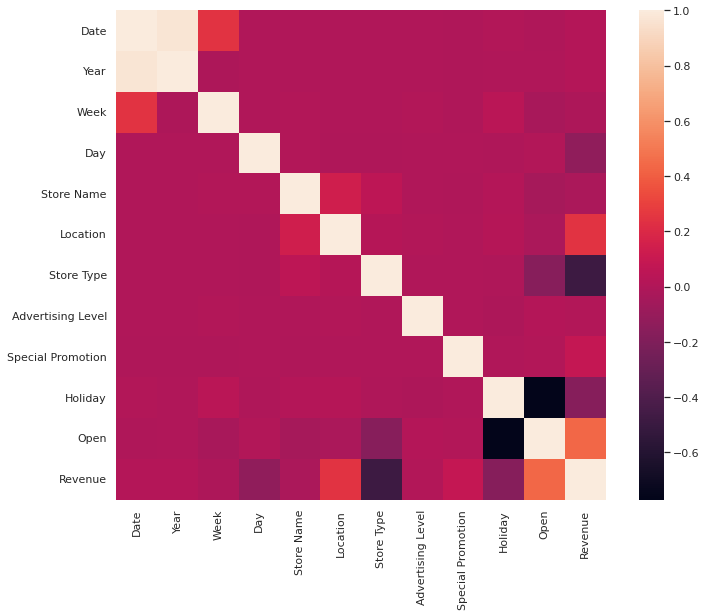

In [83]:
sidekick.plot_correlation(table)

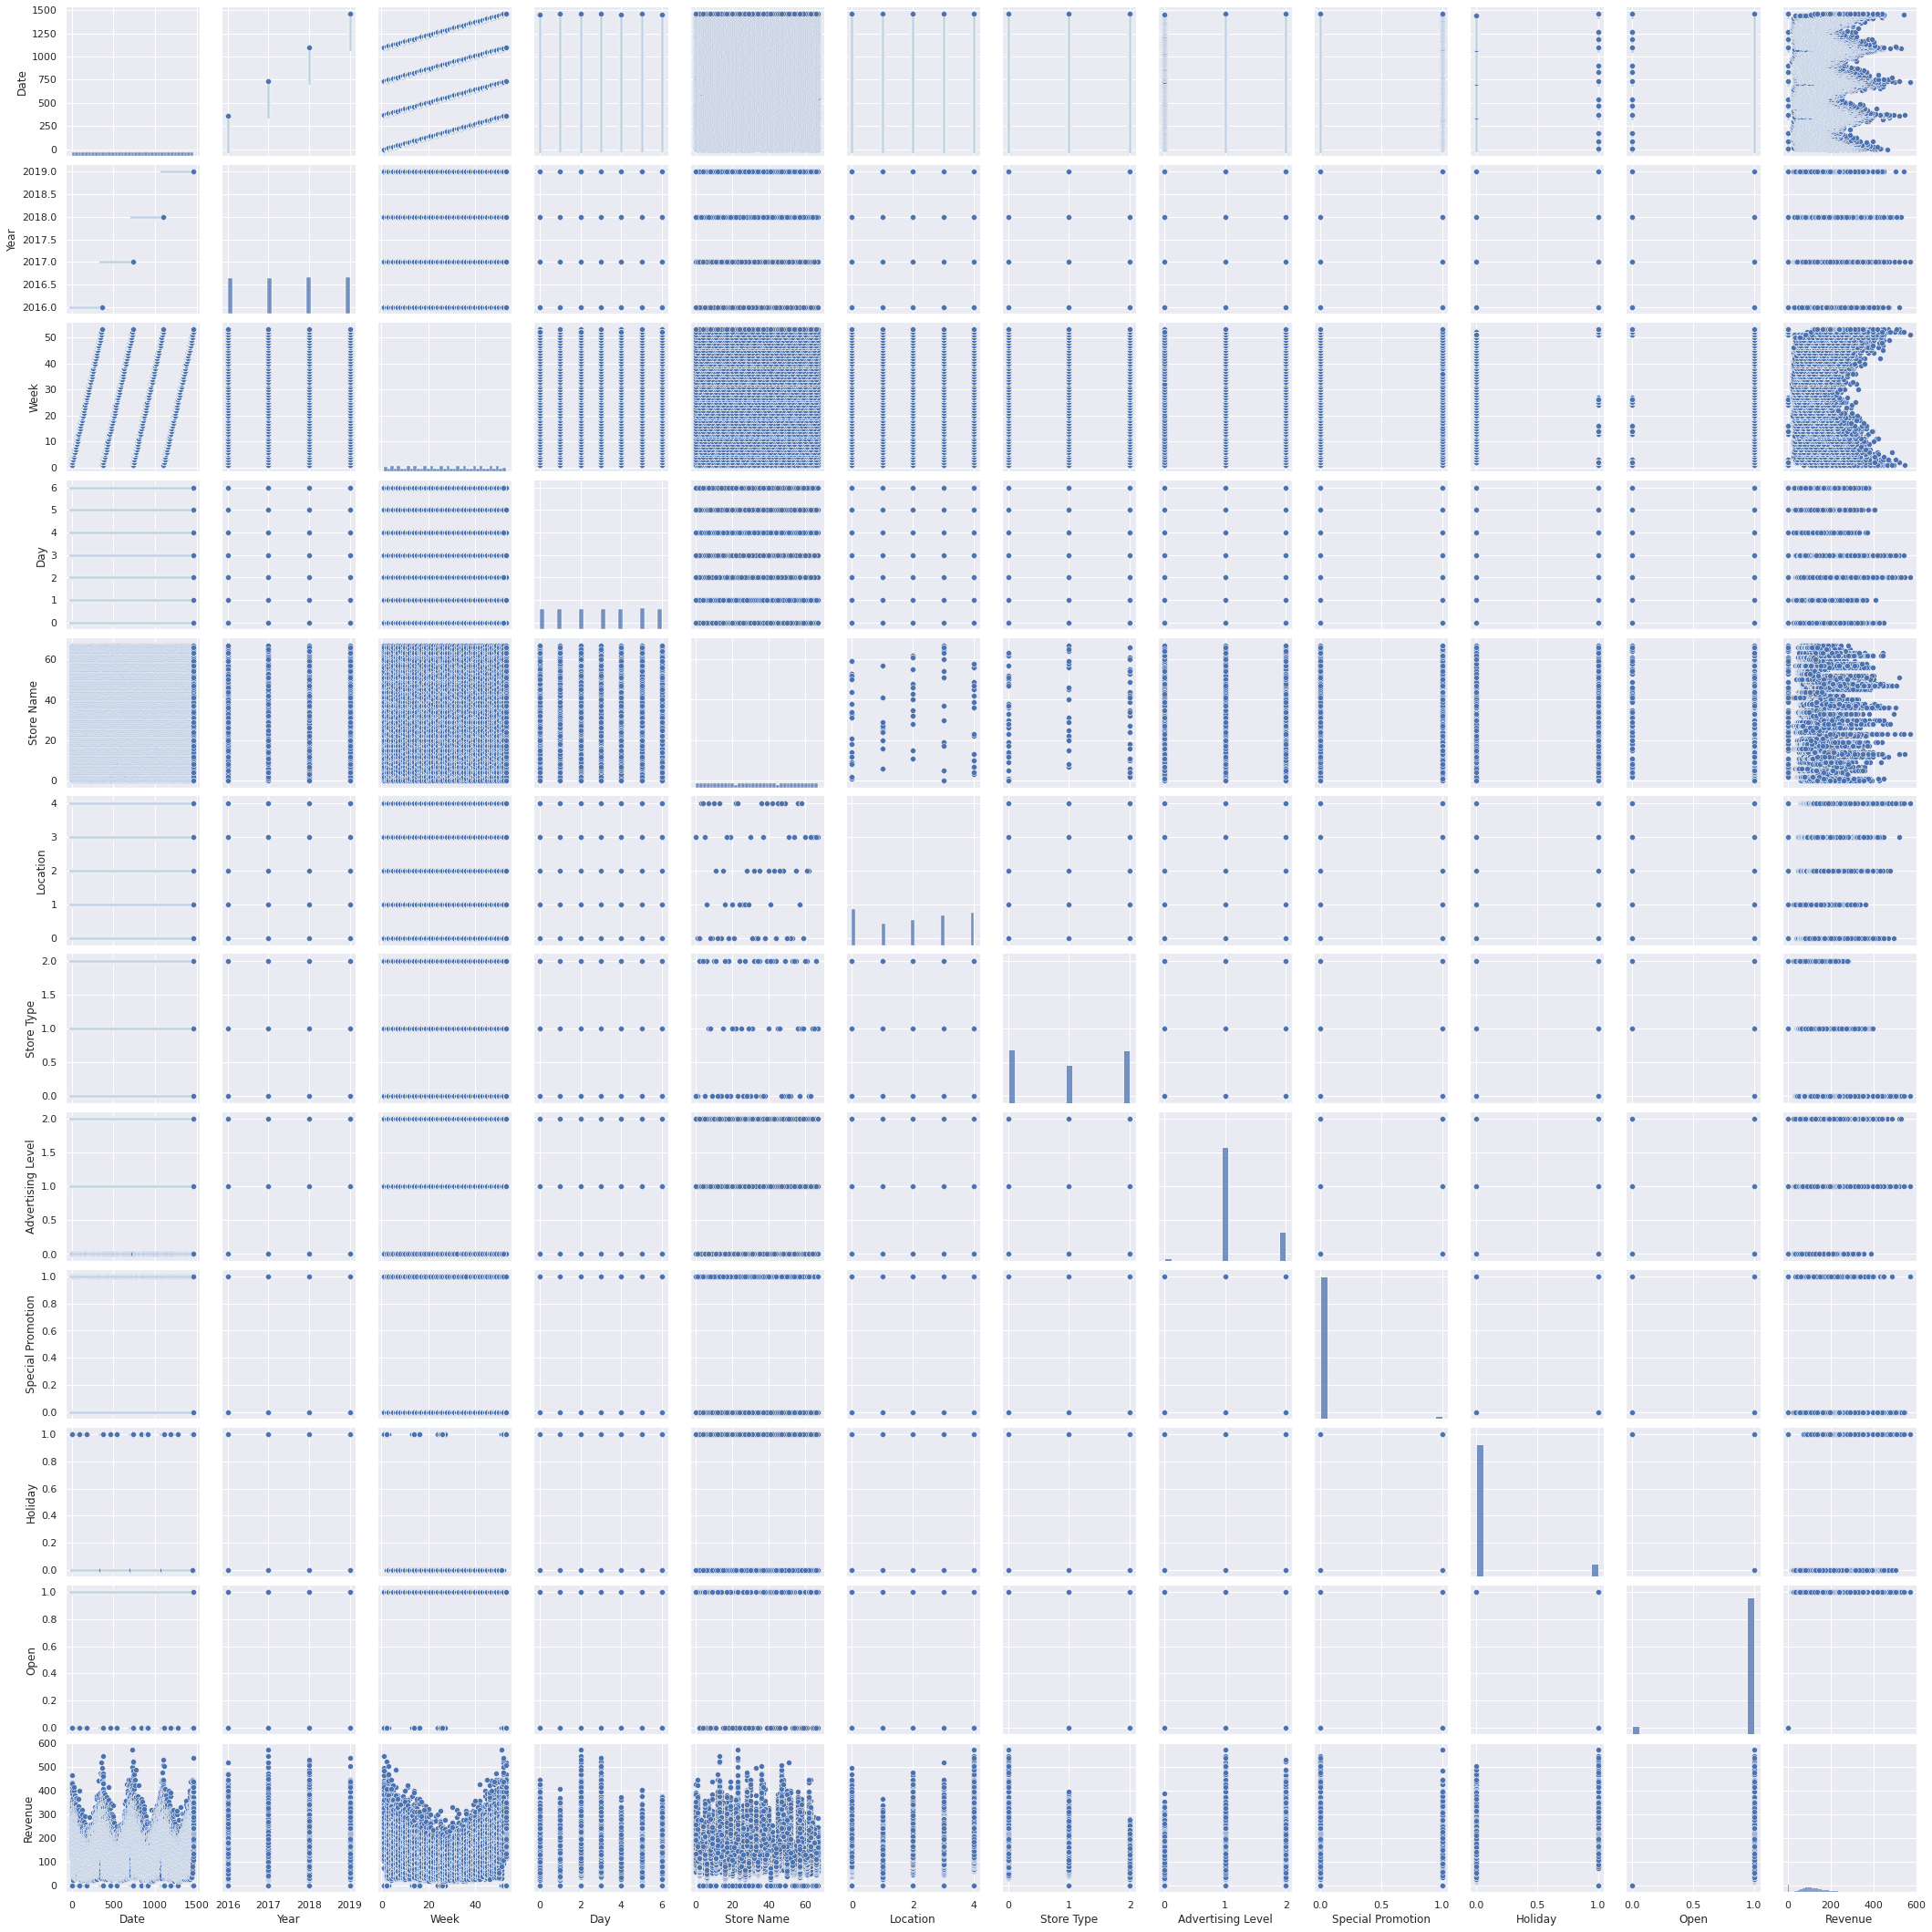

In [84]:
sidekick.plot_pairs(table, table.columns)

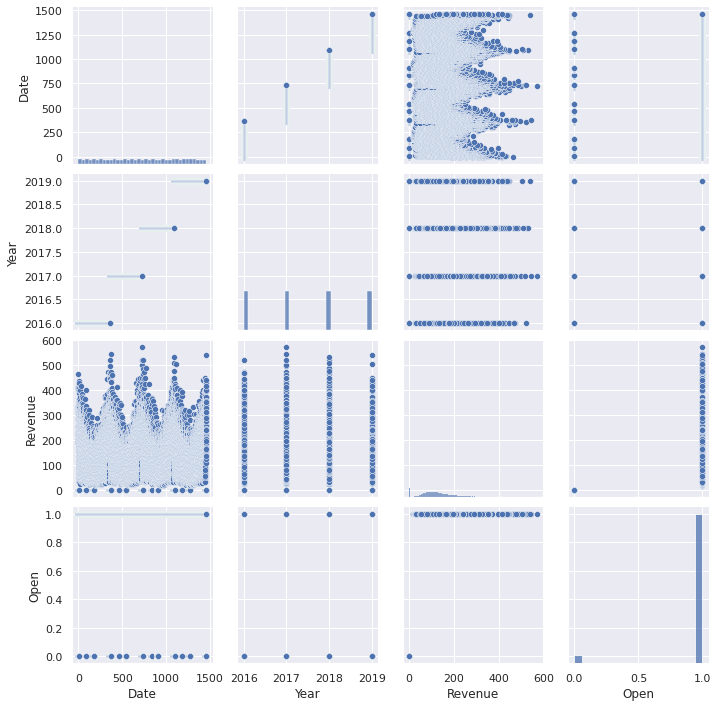

In [85]:
sidekick.plot_pairs(table, ["Date", "Year", "Revenue", "Open"], figsize=(4,9))

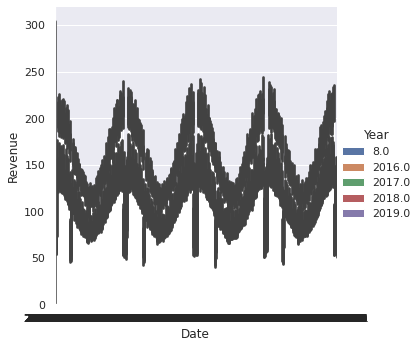

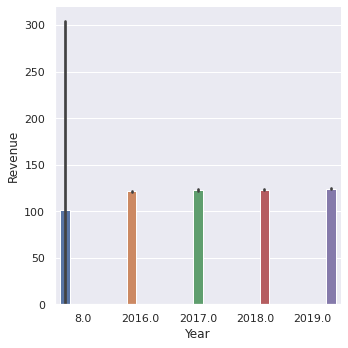

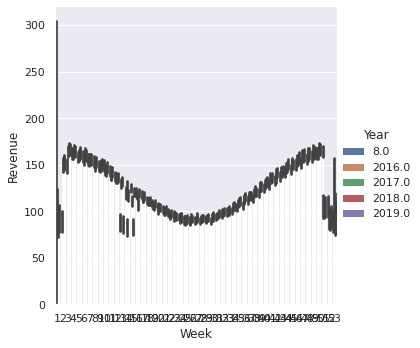

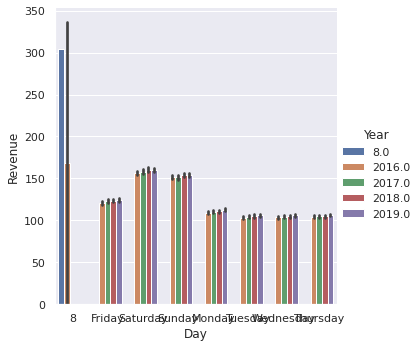

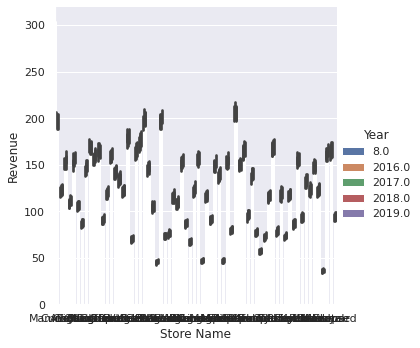

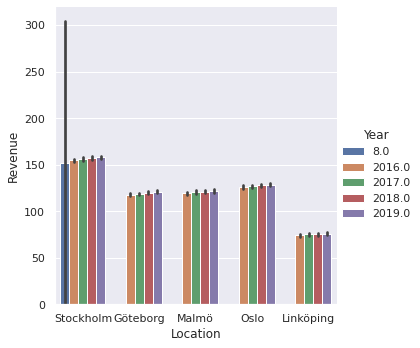

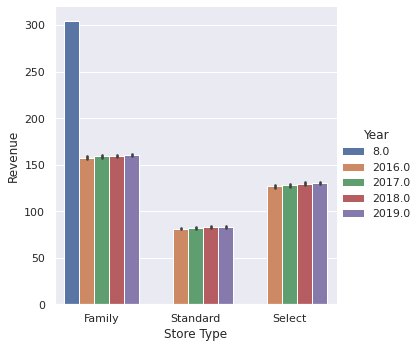

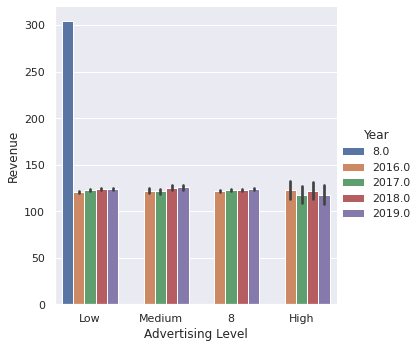

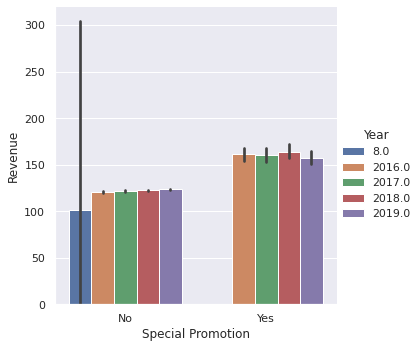

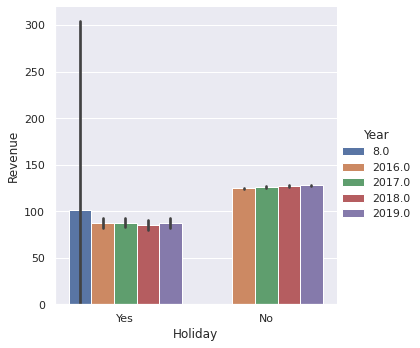

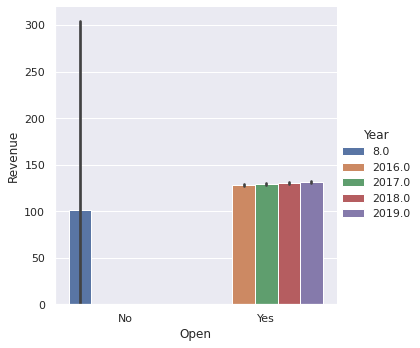

In [43]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)

target = "Revenue"

for c in table.columns:
    if c != target:
        sns.catplot(x=c, y="Revenue", hue="Year", kind="bar", data=table)

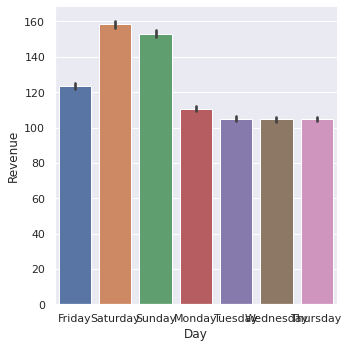

In [54]:
# sidekick.plot(table, columns="Day", target="Revenue", kind="bar")
sidekick.plot_histogram(table, columns="Day", target="Revenue")

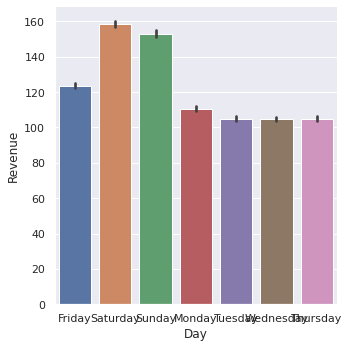

In [51]:
sns.catplot(x="Day", y="Revenue", hue=None, kind="bar", data=table)

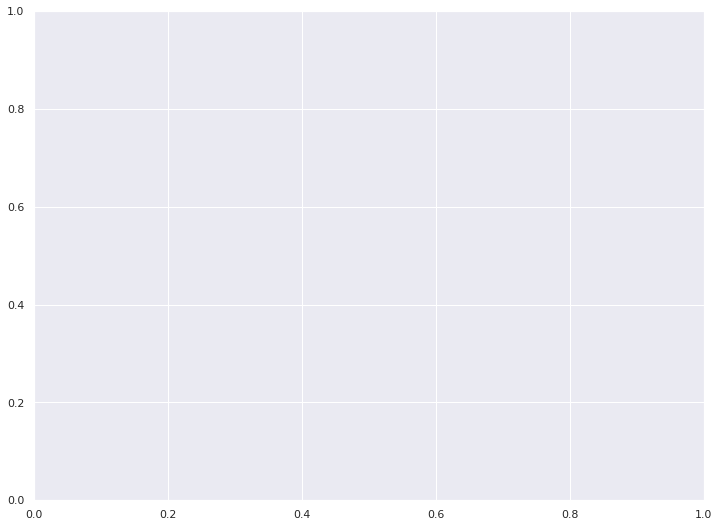

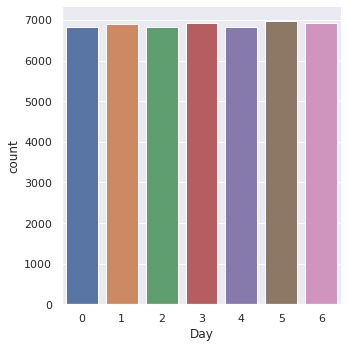

In [88]:
# TODO:
sidekick.plot_count(table, columns="Day")

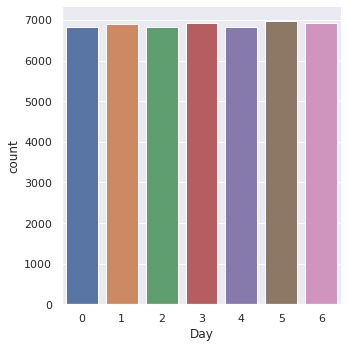

In [86]:
sns.catplot(x="Day", kind="count", data=table)

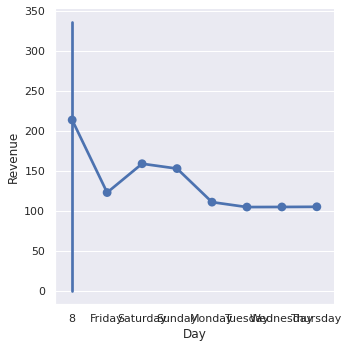

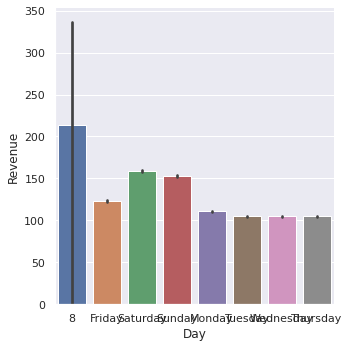

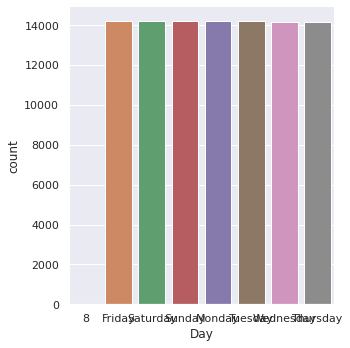

In [41]:
sns.catplot(x="Day", y="Revenue", data=table, kind="point")
sns.catplot(x="Day", y="Revenue", data=table, kind="bar")
sns.catplot(x="Day", data=table, kind="count")

strip
swarm


/home/markussagen/.pyenv/versions/3.8.5/envs/sidekick/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/markussagen/.pyenv/versions/3.8.5/envs/sidekick/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/markussagen/.pyenv/versions/3.8.5/envs/sidekick/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/markussagen/.pyenv/versions/3.8.5/envs/sidekick/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.9% of the points cannot be placed; you may want to decrease the size of the markers 

box
violin
boxen
point
bar


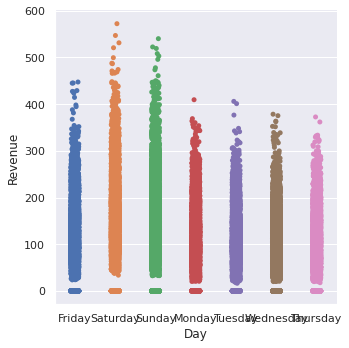

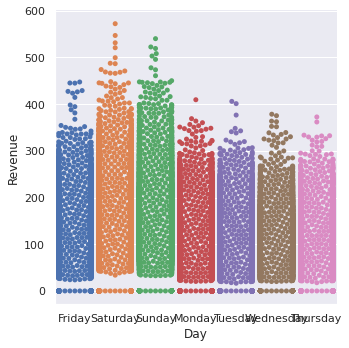

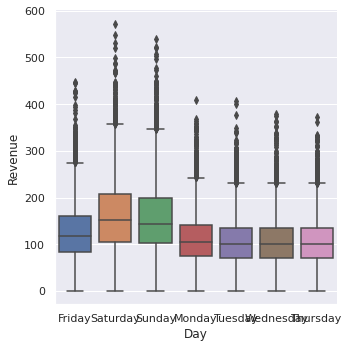

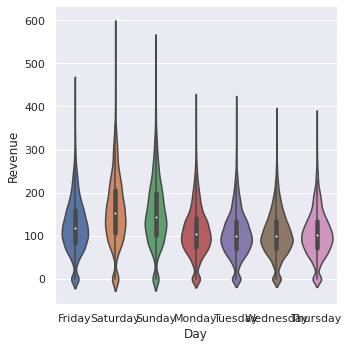

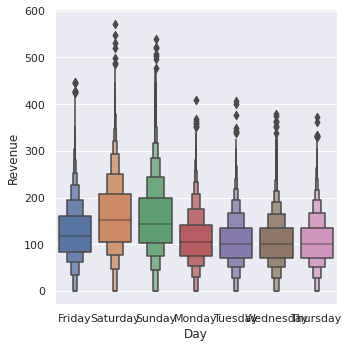

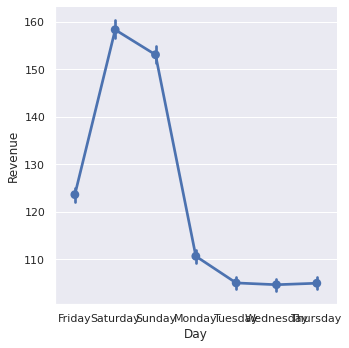

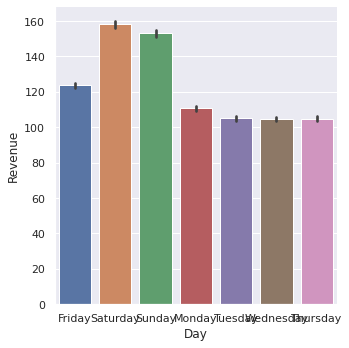

In [57]:
#sns.catplot(x="Day", y="Revenue", data=table, kind="point")
#sns.catplot(x="Day", y="Revenue", data=table, kind="bar")
#sns.catplot(x="Day", data=table, kind="count")

kinds = ["strip", "swarm", "box", "violin", "boxen", "point", "bar"]# E, "count"]

for k in kinds:
    print(k)
    sns.catplot(x="Day", y="Revenue", data=table, kind=k)


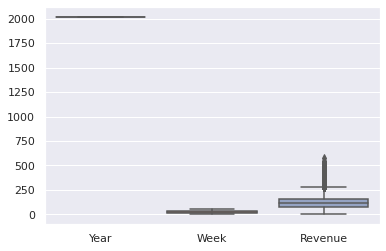

In [58]:
ax = sns.boxplot(data=table, palette="Set2")

<AxesSubplot:>

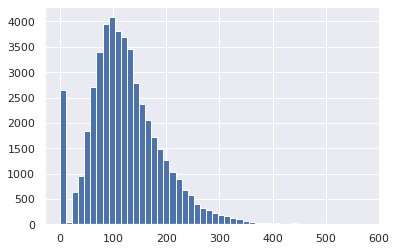

In [69]:
table["Revenue"].hist(bins=50)

In [ ]:
sns.catplot(x="", y=target, hue=hue, kind=kind, data=table, **kwargs)

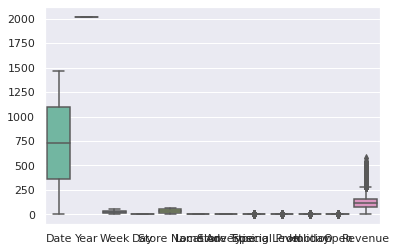

In [107]:
# 
# t = table.apply(lambda x: pd.factorize(x)[0])
from pandas.api.types import is_object_dtype

t = table.apply(lambda x: pd.Categorical(x).codes if is_object_dtype(x) else x)
ax = sns.boxplot(data=t, palette="Set2")

In [68]:

# def convert_to_categorical(table: pd.DataFrame):
#     """Convert pandas DataFrame string/objects to categorical."""

#     table = table.apply(lambda x: pd.Categorical(x).codes if is_object_dtype(x) else x)
#     return table.apply(lambda x: x.astype('category') if is_object_dtype(x) else x)

tt = sidekick.convert_to_categorical(table)
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48200 entries, 3 to 99345
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               48200 non-null  int16  
 1   Year               48200 non-null  float64
 2   Week               48200 non-null  int64  
 3   Day                48200 non-null  int8   
 4   Store Name         48200 non-null  int8   
 5   Location           48200 non-null  int8   
 6   Store Type         48200 non-null  int8   
 7   Advertising Level  48200 non-null  int8   
 8   Special Promotion  48200 non-null  int8   
 9   Holiday            48200 non-null  int8   
 10  Open               48200 non-null  int8   
 11  Revenue            48200 non-null  float64
dtypes: float64(2), int16(1), int64(1), int8(8)
memory usage: 2.9 MB


In [69]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48200 entries, 3 to 99345
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               48200 non-null  int16  
 1   Year               48200 non-null  float64
 2   Week               48200 non-null  int64  
 3   Day                48200 non-null  int8   
 4   Store Name         48200 non-null  int8   
 5   Location           48200 non-null  int8   
 6   Store Type         48200 non-null  int8   
 7   Advertising Level  48200 non-null  int8   
 8   Special Promotion  48200 non-null  int8   
 9   Holiday            48200 non-null  int8   
 10  Open               48200 non-null  int8   
 11  Revenue            48200 non-null  float64
dtypes: float64(2), int16(1), int64(1), int8(8)
memory usage: 2.9 MB
